In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download(["names",
               "stopwords",
               "twitter_samples",
               "movie_reviews",
               "averaged_perceptron_tagger",
               "vader_lexicon",
               "punkt"
              ])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\RITUJA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RITUJA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\RITUJA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\RITUJA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\RITUJA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\RITUJA\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RITUJA\AppDat

True

In [6]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")

In [8]:
df.head()

Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5

In [9]:
print(df.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


In [10]:
import nltk
import re

In [11]:
stemmer = nltk.SnowballStemmer("english")

In [12]:
from nltk.corpus import stopwords

In [13]:
import string 

In [15]:
stopword = set(stopwords.words('english'))

In [16]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

In [17]:
df["Review"] = df["Review"].apply(clean)

In [19]:
ratings = df["Rating"].value_counts()
num = ratings.index
quantity = ratings.values

In [20]:
import plotly.express as px

In [22]:
fig = px.pie(df, values = quantity, names = num, hole = 0.5)

In [23]:
fig.show()

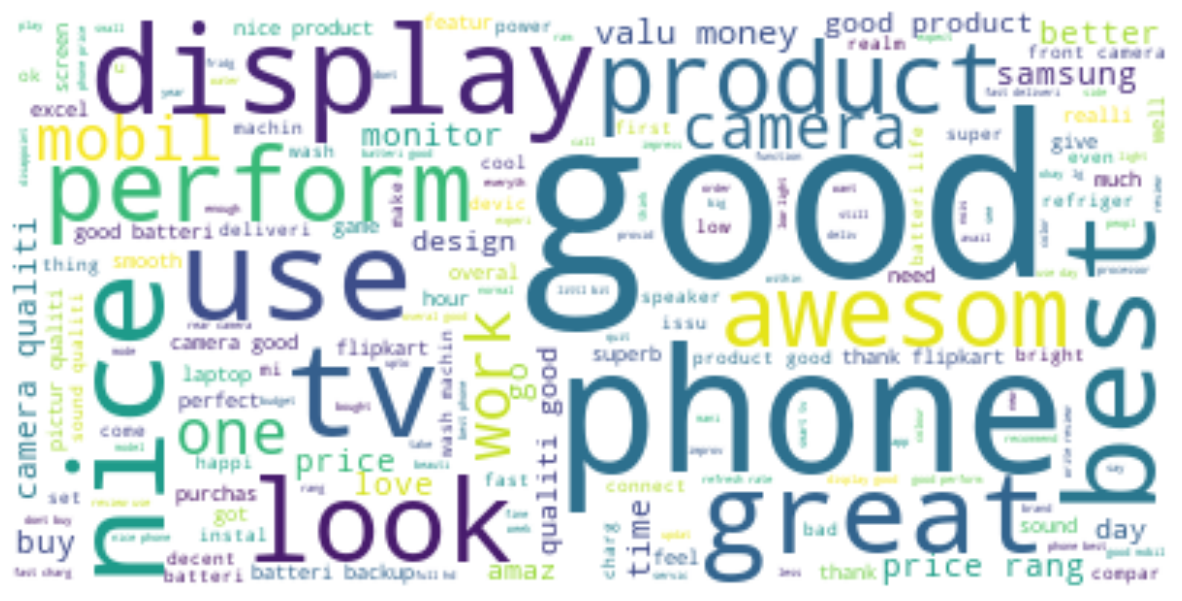

In [25]:
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]

In [27]:
df = df[["Review", "Positive", "Negative", "Neutral"]]

In [28]:
df.head()

Review  Positive  Negative  \
0  best  great performancei got around  backup bi...     0.395     0.101   
1                                        good perfom     0.744     0.000   
2  great perform usual also game laptop issu batt...     0.277     0.000   
3                        wife happi best product 👌🏻😘     0.512     0.000   
4  light weight laptop new amaz featur batteri li...     0.000     0.000   

   Neutral  
0    0.504  
1    0.256  
2    0.723  
3    0.488  
4    1.000

In [29]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

In [30]:
def sentiment_score(a,b,c):
    if (a>b) and (a>c):
        print("Positive :)")
    elif (b>a) and (b>c):
        print("Negative :(")
    else:
        print("Neutral -_-")
sentiment_score(x,y,z)

Neutral -_-


In [31]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.5529999999985
Negative:  96.77500000000013
Neutral:  1283.6880000000006
